<h1><center>Perceptron and Adaline "A" and "E" Detector</center></h1>

## Table of Contents:
* [Introduction](#Introduction)
    * [Creating Test Set 1](#creating-test-set-1-tset1-from-appendix)
    * [Creating Test Set 2](#creating-test-set-2-tset2-form-appendix)
    * [Creating Test Set 3](#creating-test-set-3-tset-3-from-appendix) 
* [1. Perceptron](#1-Perceptron)
    * [1.1 "A" Detector](#11-a-detector---single-pe-to-indicate-the-presence-of-an-a-pattern-at-the-input)
        * [1.1.1 Training: "A" Detector](#111-training-a-detector)
        * [1.1.2 Testing: "A" Detector](#112-testing-a-detector)
    * [1.2 "E" Detector](#12-e-detector---single-pe-to-indicate-the-presence-of-an-e-pattern-at-the-input)
        * [1.2.1 Training: "E" Detector](#121-training-e-detector)
        * [1.2.2 Testing: "E" Detector](#122-testing-e-detector)
    * [1.3 Comments](#13-comments)
* [2. Adaline](#2-adaline)
    * [2.1 "A" Detector](#21-a-detector)
        * [2.1.1 Training "A" Detector](#211-training-a-detector)
        * [2.1.2 Testing "A" Detector](#212-testing-a-detector)
    * [2.2 "E" Detector](#22-e-detector)   
        * [2.2.1 Training "E" Detector](#221-training-e-detector)
        * [2.2.2 Testing "E" Detector](#222-testing-e-detector)
* [Conclusion](#conclusion)
* [Appendix]()

## Introduction

The ability to recognize and classify handwritten characters is a fundamental problem in the field of machine learning. This project delves into the world of character classification by implementing two python-based algorithms to solve a simple character classification problem. This project implements two types of artificial neural networks: Perceptron and Adaptive Linear Element (Adaline) to classify vowels, specifically letters A and E, from a 4 x 5 pixelated image. These two architectures are very similar and they are both used to solve linearly seperable problems like classifying letters. The deep learning models are trained from a dataset containing 25 patterns. Five of those patterns are the "true" vowel letters, and the rest are slightly noiser versions of the vowels. After the models are trained, they are then tested with 3 different test datasets, each of increasingly higher amount of noise, to analyze how well the models performed and how the performances compare to each other. More information on the creation of the test sets is explained in the appendix

The training data set is a csv file containing 25 patterns/letters and since each letter is an image with 4 x 5 pixels, there are a total of 20 pixels that can have one of two values. These values are "1" if the pixel is on and "-1" if the pixel is off(Bipolar Encoding). This means that the training dataset has 20 columns and 25 rows. In addition to this csv containing the bipolar encoding of the pixels for each of the 25 images, there is also another csv which contains the correct classification of each of the 25 letters(1 x 25). The figures below show what is meant by the "true" letter and the noisy letter by using a true A and noisy A as an example as well as the training datasets. 

Perfect A: (Column) [displayed as a row to save space]:  [-1, -1, 1, 1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, -1, 1, 1]

Perfect A: (Matrix)
 [[-1 -1  1 -1 -1]
 [-1  1 -1  1 -1]
 [ 1  1  1  1  1]
 [ 1 -1 -1 -1  1]]


Nosiy A: (Matrix)
 [[-1  1  1 -1 -1]
 [-1  1 -1  1 -1]
 [ 1  1  1  1  1]
 [ 1 -1 -1 -1  1]]


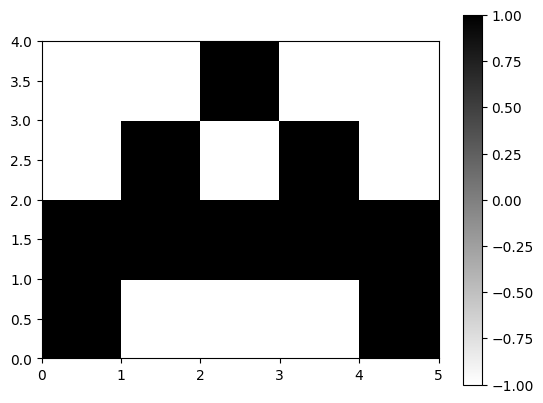

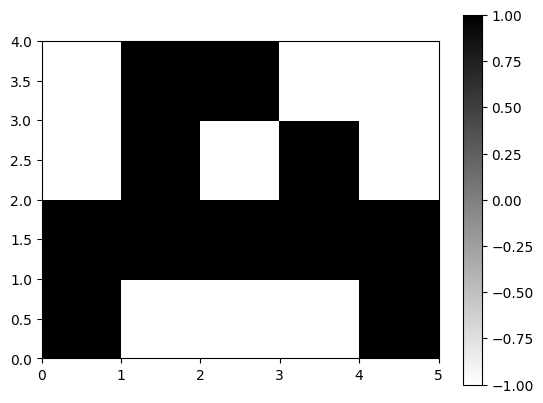

In [1]:
# Imports
import perceptron
import ada
import toolbox as tb
import pandas as pd
import numpy as np

PP = pd.read_csv(r'datasets/PPfile.csv', header = None)
TA = pd.read_csv(r'datasets/TAfile.csv', header = None)
TE = pd.read_csv(r'datasets/TEfile.csv', header = None)

pp_col0_perfect_A = tb.col2mtx(PP[0])
pp_col1_noisy_A = tb.col2mtx(PP[1])

print("Perfect A: (Column) [displayed as a row to save space]: ", PP[0].tolist())
print("\nPerfect A: (Matrix)\n", pp_col0_perfect_A)
print("\n")
print("Nosiy A: (Matrix)\n", pp_col1_noisy_A)

pp_col1_pic = tb.dispapm(pp_col0_perfect_A)
pp_col0_pic = tb.dispapm(pp_col1_noisy_A)

In [2]:
PP

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-1,-1,-1,-1,-1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,-1,-1,-1,-1,-1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,-1,1,-1,-1,-1,1,1,1,1,1,...,1,1,1,1,1,-1,1,-1,-1,-1
5,1,1,1,1,1,-1,1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
6,1,1,1,1,1,1,1,1,1,1,...,-1,-1,-1,1,-1,-1,-1,-1,1,-1
7,-1,-1,-1,-1,-1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,-1,-1,-1,-1,-1
9,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [3]:
TA

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,1,1,1,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [4]:
TE

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-1,-1,-1,-1,-1,1,1,1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


### Creating Test Set 1 (TSET1 from Appendix)

In [5]:
# Testing

# Creating TSET1
TEST_SET_1 = pd.DataFrame(index=range(20), columns=range(25))

for i in range(np.shape(TEST_SET_1)[1]):
    if i % 5 == 0:
        TEST_SET_1[i] = PP[i].copy()

        for j in range(1, 5):
            TEST_SET_1[i+j] = PP[i].copy()

        # Can use the below lines to see the vowels a, e, i, o, u
        # t_i = tb.col2mtx(TEST_SET_1[i])
        # p_i = tb.dispapm(t_i)


# Creating noisy letters for Test Set 1

# Noisy A's
tb.toggleP1(TEST_SET_1[1], 4, 1)
tb.toggleP1(TEST_SET_1[2], 5, 3)
tb.toggleP1(TEST_SET_1[3], 2, 4)
tb.toggleP1(TEST_SET_1[4], 1, 2)

# Noisy E's
tb.toggleP1(TEST_SET_1[6], 2, 4)
tb.toggleP1(TEST_SET_1[7], 5, 2)
tb.toggleP1(TEST_SET_1[8], 4, 3)
tb.toggleP1(TEST_SET_1[9], 1, 3)

# Noisy I's
tb.toggleP1(TEST_SET_1[11], 4, 4)
tb.toggleP1(TEST_SET_1[12], 2, 4)
tb.toggleP1(TEST_SET_1[13], 2, 2)
tb.toggleP1(TEST_SET_1[14], 3, 4)

# Noisy O's
tb.toggleP1(TEST_SET_1[16], 1, 3)
tb.toggleP1(TEST_SET_1[17], 3, 2)
tb.toggleP1(TEST_SET_1[18], 5, 4)
tb.toggleP1(TEST_SET_1[19], 3, 3)

# Noisy U's
tb.toggleP1(TEST_SET_1[21], 5, 3)
tb.toggleP1(TEST_SET_1[22], 3, 4)
tb.toggleP1(TEST_SET_1[23], 1, 4)
tb.toggleP1(TEST_SET_1[24], 5, 4)

# Can Use the Below lines to see a particular letter in the TEST_SET_1
# test = tb.col2mtx(TEST_SET_1[1])
# p2 = tb.dispapm(test)

TEST_SET_1


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-1,-1,-1,-1,-1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,-1,1
1,-1,-1,-1,-1,-1,1,1,1,1,-1,...,1,-1,1,1,1,1,1,1,1,1
2,1,1,1,1,-1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,-1,-1,-1,1,-1,1,-1,1,1,1,...,1,1,1,1,1,-1,-1,-1,-1,-1
5,1,1,1,1,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6,1,1,1,1,1,1,1,1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7,-1,-1,-1,-1,-1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,-1,-1,1,-1,-1
9,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,1,-1,-1,-1,-1,-1


### Creating Test Set 2 (TSET2 form Appendix)

In [6]:
# Creating TSET2
TEST_SET_2 = TEST_SET_1.copy()

# Creating noisy letters for Test Set 2

# Noisy A's
tb.toggleP1(TEST_SET_2[1], 3, 2)
tb.toggleP1(TEST_SET_2[2], 1, 3)
tb.toggleP1(TEST_SET_2[3], 3, 3)
tb.toggleP1(TEST_SET_2[4], 2, 1)

# Noisy E's
tb.toggleP1(TEST_SET_2[6], 3, 2)
tb.toggleP1(TEST_SET_2[7], 3, 3)
tb.toggleP1(TEST_SET_2[8], 5, 4)
tb.toggleP1(TEST_SET_2[9], 1, 2)

# Noisy I's
tb.toggleP1(TEST_SET_2[11], 1, 3)
tb.toggleP1(TEST_SET_2[12], 2, 2)
tb.toggleP1(TEST_SET_2[13], 4, 3)
tb.toggleP1(TEST_SET_2[14], 1, 4)

# Noisy O's
tb.toggleP1(TEST_SET_2[16], 4, 3)
tb.toggleP1(TEST_SET_2[17], 4, 3)
tb.toggleP1(TEST_SET_2[18], 5, 1)
tb.toggleP1(TEST_SET_2[19], 2, 4)

# Noisy U's
tb.toggleP1(TEST_SET_2[21], 3, 3)
tb.toggleP1(TEST_SET_2[22], 2, 2)
tb.toggleP1(TEST_SET_2[23], 2, 1)
tb.toggleP1(TEST_SET_2[24], 1, 3)

TEST_SET_2


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-1,-1,-1,-1,-1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,-1,1
1,-1,-1,1,-1,-1,1,1,1,1,-1,...,1,-1,1,1,1,1,1,1,1,-1
2,1,1,1,1,-1,1,1,1,1,-1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,-1,-1,-1,1,-1,1,-1,1,1,1,...,1,1,1,1,-1,-1,-1,-1,-1,-1
5,1,1,1,1,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6,1,1,1,1,1,1,1,1,1,1,...,-1,-1,-1,-1,-1,-1,-1,1,-1,-1
7,-1,-1,-1,-1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,-1,1
8,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,-1,-1,1,-1,-1
9,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,1,-1,1,-1,-1,-1


### Creating Test Set 3 (TSET 3 from Appendix)

In [7]:
# Creating TSET3
TEST_SET_3 = TEST_SET_2.copy()

# Creating noisy letters for Test Set 3

# Noisy A's
tb.toggleP1(TEST_SET_3[1], 5, 2)
tb.toggleP1(TEST_SET_3[2], 3, 3)
tb.toggleP1(TEST_SET_3[3], 1, 3)
tb.toggleP1(TEST_SET_3[4], 5, 1)

# Noisy E's
tb.toggleP1(TEST_SET_3[6], 3, 4)
tb.toggleP1(TEST_SET_3[7], 1, 4)
tb.toggleP1(TEST_SET_3[8], 5, 2)
tb.toggleP1(TEST_SET_3[9], 1, 3)

# Noisy I's
tb.toggleP1(TEST_SET_3[11], 1, 1)
tb.toggleP1(TEST_SET_3[12], 1, 2)
tb.toggleP1(TEST_SET_3[13], 2, 4)
tb.toggleP1(TEST_SET_3[14], 2, 1)

# Noisy O's
tb.toggleP1(TEST_SET_3[16], 1, 2)
tb.toggleP1(TEST_SET_3[17], 4, 2)
tb.toggleP1(TEST_SET_3[18], 3, 3)
tb.toggleP1(TEST_SET_3[19], 1, 4)

# Noisy U's
tb.toggleP1(TEST_SET_3[21], 3, 2)
tb.toggleP1(TEST_SET_3[22], 5, 2)
tb.toggleP1(TEST_SET_3[23], 5, 4)
tb.toggleP1(TEST_SET_3[24], 4, 2)

TEST_SET_3

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-1,-1,-1,-1,-1,1,1,-1,1,1,...,1,1,1,1,-1,1,1,1,-1,1
1,-1,-1,1,1,-1,1,1,1,1,1,...,1,-1,1,1,1,1,1,1,1,-1
2,1,1,1,1,-1,1,1,1,1,-1,...,1,-1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,-1,-1,-1,1,-1,1,-1,1,1,1,...,1,1,1,1,-1,-1,-1,-1,-1,-1
5,1,1,1,1,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6,1,1,1,1,1,1,1,1,1,1,...,-1,-1,-1,-1,-1,-1,-1,1,-1,-1
7,-1,-1,-1,-1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,-1,1
8,1,1,1,1,1,1,-1,1,1,1,...,1,1,1,1,1,-1,-1,1,-1,-1
9,-1,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,1,-1,1,-1,-1,-1


## 1. Perceptron

### 1.1 "A" Detector - Single PE to Indicate the Presence of an "A" Pattern at the Input

#### 1.1.1 Training: "A" Detector

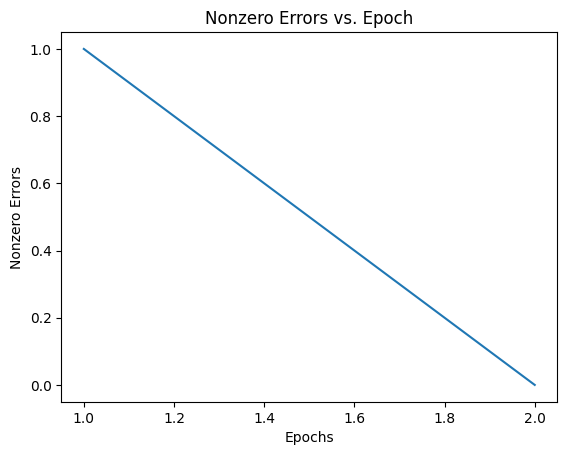

In [8]:
MAX_EPOCHS = 40

# Initial Weights and bias
W0 = [0] * len(PP[0])
b_init = 0

w_final_a, b_final_a, nze_final_a = perceptron.perceptrn(W0, b_init, PP, TA, MAX_EPOCHS)


In [9]:
final_A_detector = {
    'Final Weight Matrix': [w_final_a],
    'Final Bias': [b_final_a],
    'Final NonZero Error': [nze_final_a]
}
pd.set_option("max_colwidth", None)

final_A_detector_df = pd.DataFrame(final_A_detector)

final_A_detector_df



,Final Weight Matrix,Final Bias,Final NonZero Error
0,"[-2, -2, -2, -2, -2, 2, -2, -2, -2, 2, -2, -2, -2, 2, 2, -2, -2, 2, 2, -2]",-2,0


#### 1.1.2 Testing: "A" Detector

In [10]:
print("TEST SET 1")
perceptron.predict(w_final_a, b_final_a, TEST_SET_1, TA)

print("\nTEST SET 2")
perceptron.predict(w_final_a, b_final_a, TEST_SET_2, TA)

print("\nTEST SET 3")
perceptron.predict(w_final_a, b_final_a, TEST_SET_3, TA)


TEST SET 1
Accuracy 100.0
Patterns Missed []

TEST SET 2
Accuracy 100.0
Patterns Missed []

TEST SET 3
Accuracy 100.0
Patterns Missed []


### 1.2 "E" Detector - Single PE to Indicate the Presence of an "E" Pattern at the Input

#### 1.2.1 Training "E" Detector

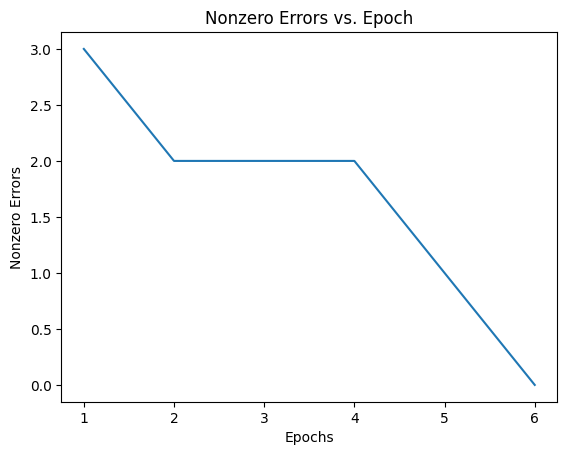

In [11]:
MAX_EPOCHS = 40

# Initial Weights and bias
W0 = [0] * len(PP[0])
b_init = 0

w_final_e, b_final_e, nze_final_e = perceptron.perceptrn(W0, b_init, PP, TE, MAX_EPOCHS)

In [12]:
final_E_detector = {
    'Final Weight Matrix': [w_final_e],
    'Final Bias': [b_final_e],
    'Final NonZero Error': [nze_final_e]
}
final_E_detector_df = pd.DataFrame(final_E_detector)

final_E_detector_df

,Final Weight Matrix,Final Bias,Final NonZero Error
0,"[4, 8, 0, 0, 0, 0, 4, 0, -8, 0, 4, 0, 0, 0, 0, 0, 8, -4, -12, 0]",-8,0


#### 1.2.2 Testing: "E" Detector

In [13]:
print("TEST SET 1")
perceptron.predict(w_final_e, b_final_e, TEST_SET_1, TE)

print("\nTEST SET 2")
perceptron.predict(w_final_e, b_final_e, TEST_SET_2, TE)

print("\nTEST SET 3")
perceptron.predict(w_final_e, b_final_e, TEST_SET_3, TE)

TEST SET 1
Accuracy 96.0
Patterns Missed [22]

TEST SET 2
Accuracy 92.0
Patterns Missed [15, 22]

TEST SET 3
Accuracy 80.0
Patterns Missed [8, 9, 15, 22, 23]


### 1.3 Comments

The Perceptron algorithm performed well overall however, there are some important distinctions between the "A detector" and the "E" detector. First of all, during training, the "A" detector had only 1 nonzero error and it only required 2 epochs. The "E" detector however, required 6 epochs and had a total of 3 nonzero errors. The final weight matrix of both detectors were also different. The final weight matrix for the "A" detector had nonzero values for all of the pixels and had a bias of -2, while that of the "E" detector had only 8 nonzero weights and had a bias of -8.

In regards to performance, the "A" detector clearly outperformed the "E" detector during testing. The "A" detector achieved 100% accuracy on all three test sets, while the "E" detector scored 96% on test set 1 (24/25 correct), 92% on test set 2 (23/25 correct), and 88% on test set 3 (20/25 correct). This means that the "A" detector is less susceptible to noise. A plausible reason for the susceptibility from noise is that because it is a 4x5 matrix the middle/center bar blends in with the bottom bar and even to the human eye doesn't look much like an E.

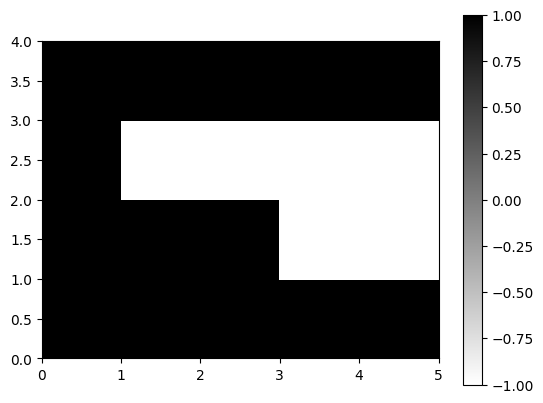

In [14]:
PP_perfect_E = tb.col2mtx(PP[5])

pp_perfect_E_pic = tb.dispapm(PP_perfect_E)

## 2. Adaline

### 2.1 "A" Detector

#### 2.1.1 Training: "A" Detector

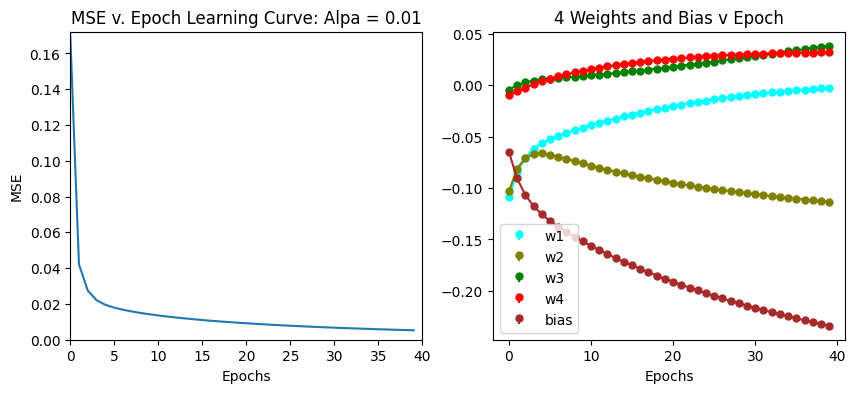

,Final Weight Matrix,Final Bias,Final MSE
0,"[-0.0024220938488225636, -0.11341553734441916, 0.03862595727558704, 0.03220142190035786, -0.03527393623483917, 0.05478442616937347, 0.029907134546664296, -0.38607963176521587, 0.039356023960567144, -0.06273971509222143, 0.01731625674932735, -0.11210743196123915, -0.02915246153011033, 0.04413513181293936, 0.039088151701859725, -0.13564274124175293, -0.11341553734441916, -0.01731625674932735, 0.07333235425988112, 0.03862595727558704]",-0.234038,0.005269


In [15]:
alpha1 = 0.01

w_final_alpha1_A, b_final_alpha1_A, MSE_final_alpha1_A = ada.ada(W0, b_init, alpha1, PP, TA, MAX_EPOCHS)

final_ADA_alpha1_A = {
    'Final Weight Matrix': [w_final_alpha1_A],
    'Final Bias': [b_final_alpha1_A],
    'Final MSE': [MSE_final_alpha1_A]
    }
final_ADA_vals_alpha1_df = pd.DataFrame(final_ADA_alpha1_A)
    
final_ADA_vals_alpha1_df

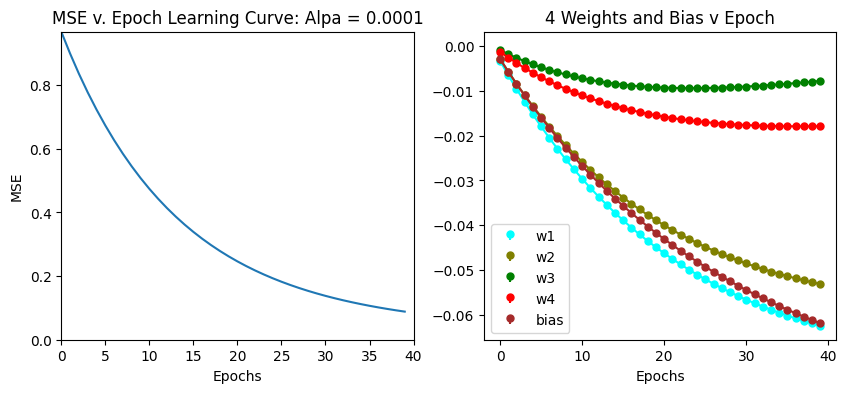

,Final Weight Matrix,Final Bias,Final MSE
0,"[-0.06234021923803526, -0.05306710578420823, -0.00783615951129388, -0.017919884519194386, -0.06259202244048111, 0.09108178018920145, 0.05179120184691301, -0.10701324119315452, -0.019470440144691264, 0.015572893690178218, 0.013807371591189468, -0.09703750001386184, -0.07176904920090217, 0.0794395405141531, 0.07023031230870344, -0.09707080710696131, -0.05306710578420823, -0.013807371591189468, 0.024211176730568003, -0.00783615951129388]",-0.061782,0.088345


In [16]:
alpha2 = 0.0001

w_final_alpha2_A, b_final_alpha2_A, MSE_final_alpha2_A = ada.ada(W0, b_init, alpha2, PP, TA, MAX_EPOCHS)

final_ADA_alpha2_A = {
    'Final Weight Matrix': [w_final_alpha2_A],
    'Final Bias': [b_final_alpha2_A],
    'Final MSE': [MSE_final_alpha2_A]
    }
final_ADA_vals_alpha2_df = pd.DataFrame(final_ADA_alpha2_A)
    
final_ADA_vals_alpha2_df

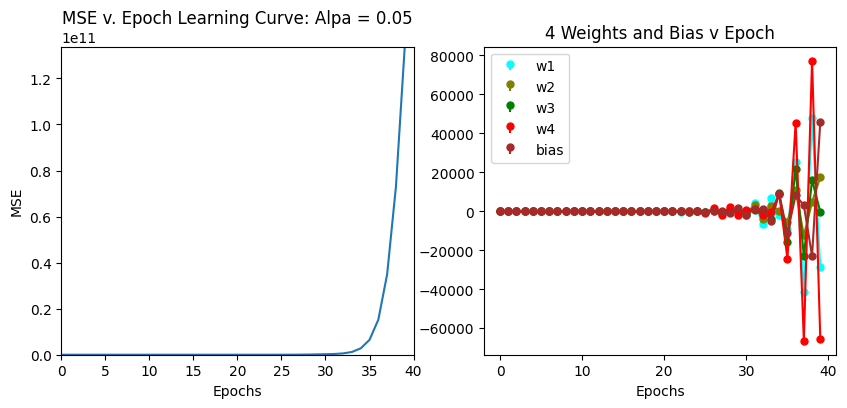

,Final Weight Matrix,Final Bias,Final MSE
0,"[-28641.359638151265, 17451.425192142135, -273.0585247403542, -65345.888957956515, -24664.149022598354, -77848.83061465072, -115460.64899272968, 63362.65473463097, 10984.397940568135, -11433.17478787652, 6833.040278114309, 82830.85124877364, 115646.39817379435, 12468.845232453594, 98070.48127974139, 45370.556262472295, 17451.425192142135, -6833.040278114309, -54319.64959492508, -273.0585247403542]",45638.171018,1.337664e+11


In [17]:
alpha3 = 0.05

w_final_alpha3_A, b_final_alpha3_A, MSE_final_alpha3_A = ada.ada(W0, b_init, alpha3, PP, TA, MAX_EPOCHS)

final_ADA_alpha3_A = {
    'Final Weight Matrix': [w_final_alpha3_A],
    'Final Bias': [b_final_alpha3_A],
    'Final MSE': [MSE_final_alpha3_A]
    }
final_ADA_vals_alpha3_df = pd.DataFrame(final_ADA_alpha3_A)
    
final_ADA_vals_alpha3_df

#### 2.1.2 Testing: "A" Detector

In [18]:
print("TEST SET 1")
ada.predict(w_final_alpha1_A, b_final_alpha1_A, alpha1, TEST_SET_1, TA)

print("\nTEST SET 2")
ada.predict(w_final_alpha1_A, b_final_alpha1_A, alpha1, TEST_SET_2, TA)

print("\nTEST SET 3")
ada.predict(w_final_alpha1_A, b_final_alpha1_A, alpha1, TEST_SET_3, TA)

TEST SET 1
Accuracy 100.0
Patterns Missed []

TEST SET 2
Accuracy 100.0
Patterns Missed []

TEST SET 3
Accuracy 100.0
Patterns Missed []


### 2.2 "E" Detector

#### 2.2.1 Training: "E" Detector

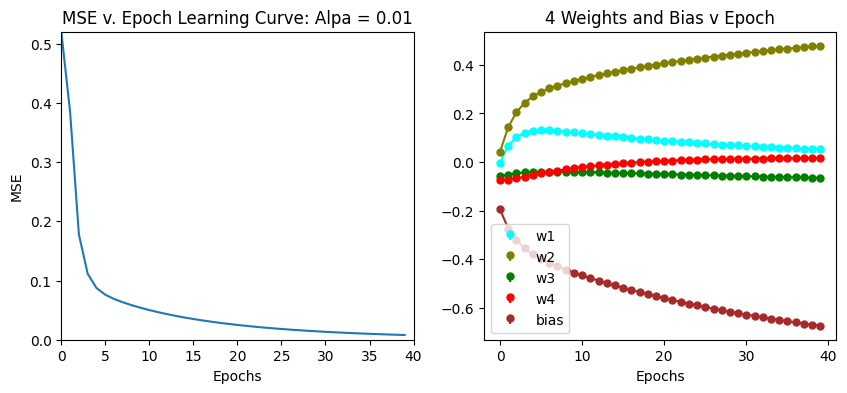

,Final Weight Matrix,Final Bias,Final MSE
0,"[0.052738319749962057, 0.478656399871627, -0.06473123608607938, 0.015906378836961367, 0.03398849764952014, 0.03455992008907913, 0.09423082481532122, -0.129890267644855, -0.1537283564198414, -0.002188688617871297, 0.4266877505725824, -0.030395843212768565, 0.10382743934201338, 0.035358060164499105, 0.0422068579787121, -0.04139222504450077, 0.478656399871627, -0.4266877505725824, -0.09868544777282845, -0.06473123608607938]",-0.673278,0.007953


In [19]:
alpha1 = 0.01

w_final_alpha1_E, b_final_alpha1_E, MSE_final_alpha1_E = ada.ada(W0, b_init, alpha1, PP, TE, MAX_EPOCHS)

final_ADA_alpha1_E = {
    'Final Weight Matrix': [w_final_alpha1_E],
    'Final Bias': [b_final_alpha1_E],
    'Final MSE': [MSE_final_alpha1_E]
    }
final_ADA_vals_alpha1_E_df = pd.DataFrame(final_ADA_alpha1_E)
    
final_ADA_vals_alpha1_E_df

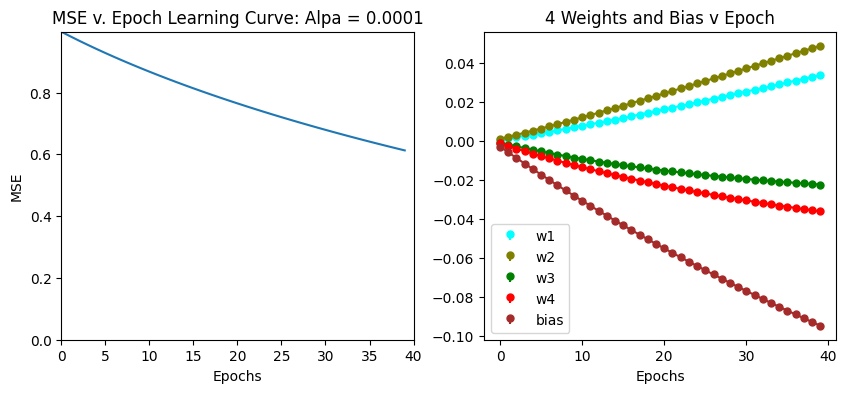

,Final Weight Matrix,Final Bias,Final MSE
0,"[0.03362023807668391, 0.0486846066106223, -0.0224968779760332, -0.03626110205218023, 0.011949482942918229, 0.026376674946974616, 0.07702760448155947, -0.023734279758282965, -0.03222075859595608, 0.007875850338952089, 0.03165845739959073, -0.037446425591530254, 0.026393742626022534, 0.012184316475566332, 0.0007553959291640109, -0.03740056254672842, 0.0486846066106223, -0.03165845739959073, -0.08553027667472124, -0.0224968779760332]",-0.094916,0.612618


In [20]:
alpha2 = 0.0001

w_final_alpha2_E, b_final_alpha2_E, MSE_final_alpha2_E = ada.ada(W0, b_init, alpha2, PP, TE, MAX_EPOCHS)

final_ADA_alpha2_E = {
    'Final Weight Matrix': [w_final_alpha2_E],
    'Final Bias': [b_final_alpha2_E],
    'Final MSE': [MSE_final_alpha2_E]
    }
final_ADA_vals_alpha2_E_df = pd.DataFrame(final_ADA_alpha2_E)
    
final_ADA_vals_alpha2_E_df

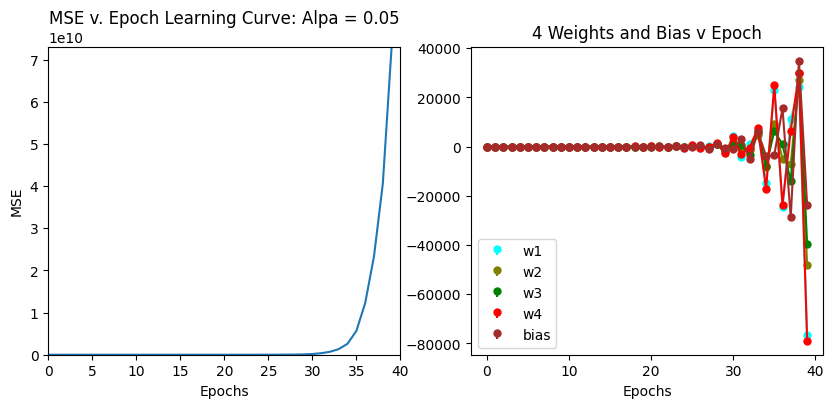

,Final Weight Matrix,Final Bias,Final MSE
0,"[-76717.83280187893, -48119.732588863466, -39608.56700682736, -78904.17905604168, 3513.2617118774942, 27272.837402460427, -2759.2830091320648, -32277.82184313048, 8775.751127322816, 45391.56928536804, 3676.1041033385263, -52049.91503238103, -19243.5057237727, 92640.08990530399, -57418.429949974816, -15653.65422465581, -48119.732588863466, -3676.1041033385263, 20636.718227227393, -39608.56700682736]",-23766.656261,7.303039e+10


In [21]:
alpha3 = 0.05

w_final_alpha3_E, b_final_alpha3_E, MSE_final_alpha3_E = ada.ada(W0, b_init, alpha3, PP, TE, MAX_EPOCHS)

final_ADA_alpha3_E = {
    'Final Weight Matrix': [w_final_alpha3_E],
    'Final Bias': [b_final_alpha3_E],
    'Final MSE': [MSE_final_alpha3_E]
    }
final_ADA_vals_alpha3_E_df = pd.DataFrame(final_ADA_alpha3_E)
    
final_ADA_vals_alpha3_E_df

#### 2.2.2 Testing: "E" Detector

In [22]:
print("TEST SET 1")
ada.predict(w_final_alpha1_E, b_final_alpha1_E, alpha1, TEST_SET_1, TE)

print("\nTEST SET 2")
ada.predict(w_final_alpha1_E, b_final_alpha1_E, alpha1, TEST_SET_2, TE)

print("\nTEST SET 3")
ada.predict(w_final_alpha1_E, b_final_alpha1_E, alpha1, TEST_SET_3, TE)

TEST SET 1
Accuracy 96.0
Patterns Missed [10]

TEST SET 2
Accuracy 100.0
Patterns Missed []

TEST SET 3
Accuracy 88.0
Patterns Missed [4, 9, 22]


## Conclusion

In this study, the application of artificial neural networks, specifically the Perceptron and Adaptive Linear Element (Adaline), was examined in the context of character classification. The primary objective was to distinguish between two vowel letters, A and E, within 4 x 5 pixelated images. While these two neural network architectures share fundamental similarities, they serve as robust tools for solving linearly separable classification problems.

The dataset consisted of 25 patterns, with five of them representing the "true" vowel letters. The remaining patterns introduced varying levels of noise, resulting in distortions in the letter representations. Each letter was encoded as an image with a 4 x 5 pixel grid. Bipolar encoding was employed, representing activated pixels as "1" and deactivated pixels as "-1." Consequently, the training dataset featured 20 columns and 25 rows.

The Perceptron and Adaline models were rigorously implemented to categorize the vowels. After the training phase, a comprehensive evaluation of the models was conducted using three distinct test datasets. This analysis provided valuable insights into the models' accuracy, highlighting the influence of noise levels on their performance.

The Perceptron "A" detector exhibited a remarkable level of precision, achieving a consistent 100% accuracy across all test datasets. Notably, it maintained this high level of accuracy even in the presence of substantial noise. In contrast, the Perceptron "E" detector displayed a sensitivity to noise, with its accuracy decreasing as the noise levels intensified.

The Adaline "A" and "E" detectors delivered noteworthy accuracy, achieving perfect scores in low-noise environments. This underscores the resilience and effectiveness of the Adaline model when using a suitable alpha value (0.01 in this case), particularly in situations characterized by noise.

In summary, the study demonstrates the substantial potential of Perceptron and Adaline neural network models for character classification tasks. Their accuracy, once properly trained and optimized, is noteworthy. The choice between these models hinges on the specific requirements and the capacity to tolerate noise in the classification task.
